# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import libbrary to supress the warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Determine the shape (Rows and Columns) of the dataset
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All columns have 1898 observations indicating that there are no null values in the dataset
* the rating column is an object type wich mean that we will need to convert it to to integer in the case of any calculations required
* All other columns are the correct data types



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Findout which columns contain null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* None of the columns contain NULL values meaning that the dataset is complete

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Find out the main stats from the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The most important statiscs from this summary are:
* the average cost for any order is 16.49 dollars with a standard deviation of 7.48 dollars. Approximately 98% of the orders are between 0 and 30
* The delivery time ranges from 15 to 33 minutes and aproximately 95% of the orders range from 15 to 35 mins
* The food preparation time ranges from 20 to 35 minutes and the average order preparation time is 27 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Find out how many orders are not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 39% of the orders are not rated
* from the 61% of the orders that have been rated, 50% of the orders have been rated 5 which is a great achievement  

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## Unique Values

In [8]:
df['order_id'].nunique() # unique orders

1898

In [9]:
df['customer_id'].nunique() # unique customers

1200

In [10]:
df['restaurant_name'].nunique() # unique restaurants

178

#### Observations:
The composition of the dataset shows 1889 distinct orders which come from 1200 customers and 178 unique restaurants

## Cuisine Type

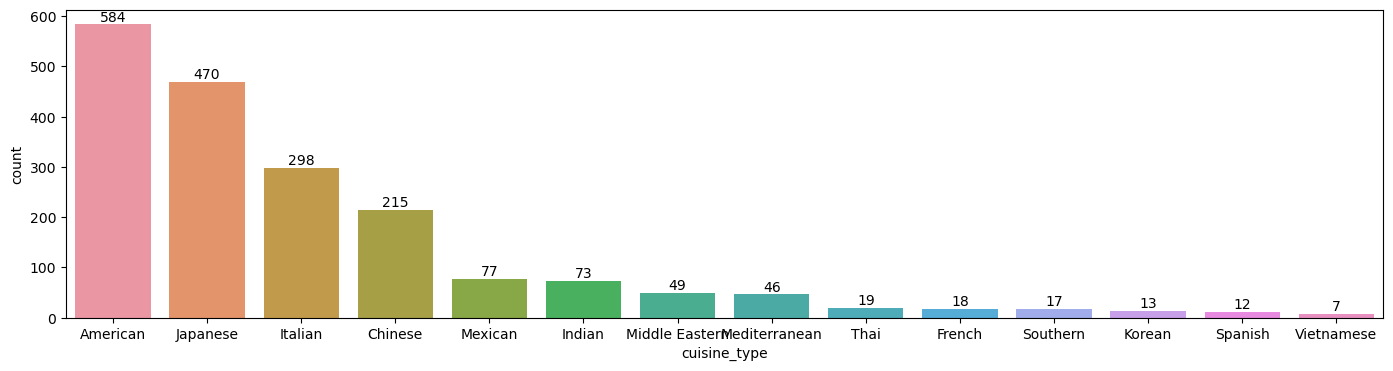

In [11]:
# Count plot for cuisine type
plt.figure(figsize=(17, 4))
cuisineType = sns.countplot(df.cuisine_type, order = df.cuisine_type.value_counts().index)

for container in cuisineType.containers:
    cuisineType.bar_label(container)

#### Observations:

The top four Cuisines are:
* Amercian
* Japanese
* Italian
* Chinese

More than 80% of the orders are concentrated in this 4 types of cousines which are the biggest sellers

## Cost of the Order

<AxesSubplot:ylabel='cost_of_the_order'>

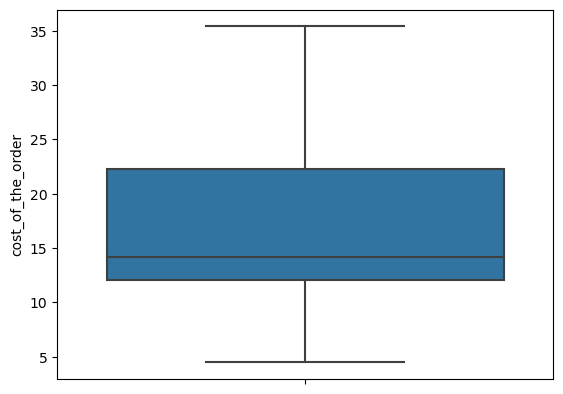

In [12]:
# boxplot for the Cost of Order
sns.boxplot(y="cost_of_the_order", data=df)

#### Observations:

From this boxplot we can immediately see that the median of the cost of the orders is aroun the 15 dollar mark. The whole sample data extends from 5 to 35 dollars and the majority of the orders are between 13 and 23 dollars (by visual assessment)

## Day of the Week

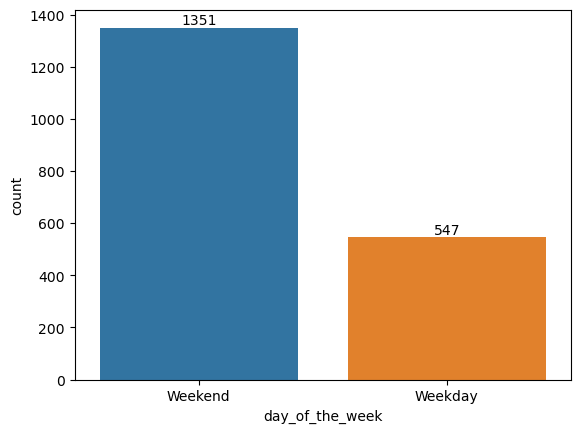

In [13]:
# Count plot for orders during the day of the week
dayOfWeek = sns.countplot(df.day_of_the_week, order = df.day_of_the_week.value_counts().index)

for container in dayOfWeek.containers:
    dayOfWeek.bar_label(container)

#### Observations:

The majority orf the orders are placed during the weekends represented by 70% of the total orders. The weekdays only represent 30%

## Rating Count

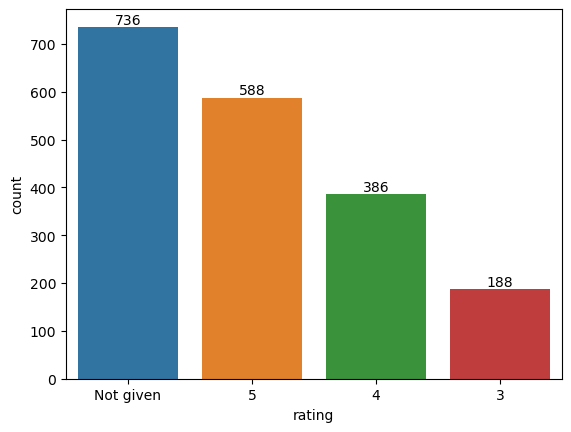

In [14]:
# Count plot for the rating
rating = sns.countplot(df.rating, order = df.rating.value_counts().index)

for container in rating.containers:
    rating.bar_label(container)

#### Observations:
* 39% of the Orders haven't given a Rating. This is a very high percentage that can be improved and therefore have a positive impact on sales.
* 31% of the orders have a rating of 5 which is outstanding.

## Preparation time

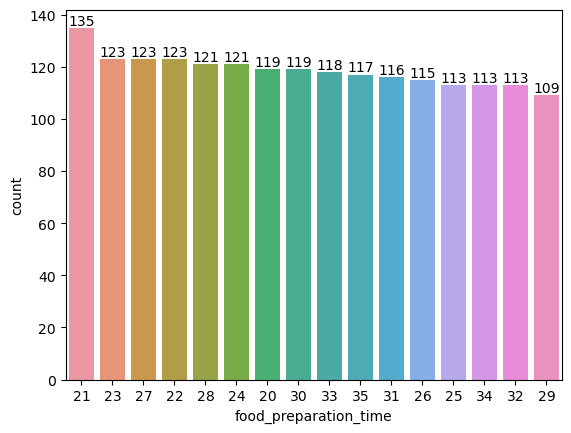

In [15]:
# Count plot for the preparation time
prepTime = sns.countplot(df.food_preparation_time, order = df.food_preparation_time.value_counts().index)

for container in prepTime.containers:
    prepTime.bar_label(container)


#### Observations:
At first glance, the majority of the orders have the least preparation times which is a positive indication of efficiency

## Delivery Time

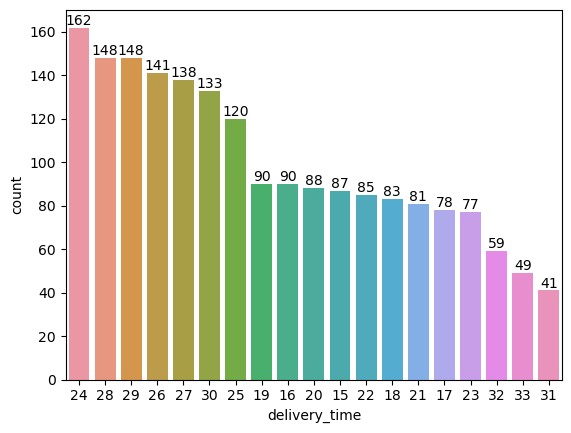

In [16]:
# Count plot for the delivery time
deliveryTime = sns.countplot(df.delivery_time, order = df.delivery_time.value_counts().index)

for container in deliveryTime.containers:
    deliveryTime.bar_label(container)

#### Observations:
The correlation between the amount of deliveries and the delivery time is not clear. There might be additional factors that affect these times and are not contemplated in this data set. Further investigation or additional data should be requested to make the correct asessment.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# DEtermine the top 5 restaurants
top5restaurants = df.groupby('restaurant_name')['order_id'].count()
top5restaurants.sort_values(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The top 5 restaurant with most orders are:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

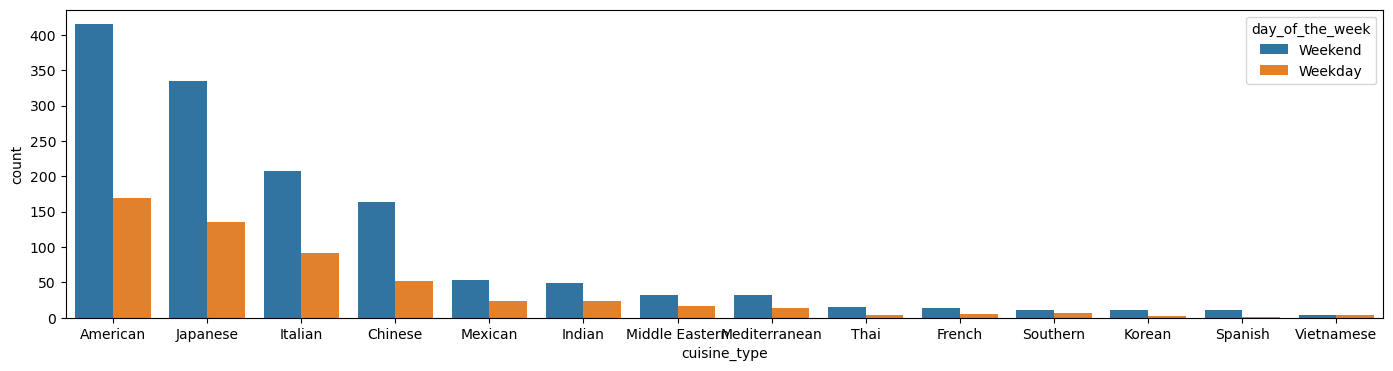

In [18]:
# determine the most popular cuisine on the weekends
plt.figure(figsize=(17, 4))
sns.countplot(x="cuisine_type", hue="day_of_the_week", data=df, order = df.cuisine_type.value_counts().index)

#### Observations:
The most popular cuisine during the weekends is the American Cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Calculate the orers greater than 20 dollars
ordersGreaterThan20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].count ()
totalOrders = df['order_id'].nunique()

# Calculate the porcentage from tota
PCT = round((ordersGreaterThan20/totalOrders)*100,2)
print(PCT," % of the orders are greater than 20 dollars")

29.24  % of the orders are greater than 20 dollars


#### Observations:
* 29.24  % of the orders are greater than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Order Delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Determine the top 3 most frequent customers
top3customers = df.groupby('customer_id')['order_id'].count()
top3customers.sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
The 20% discount vouchers should go to the following most frequent customers:
* 52832
* 47440
* 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## Correlation

In [22]:
# Determine the different correlatiosn across the dataset
corr = df.corr()
corr

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


<AxesSubplot:>

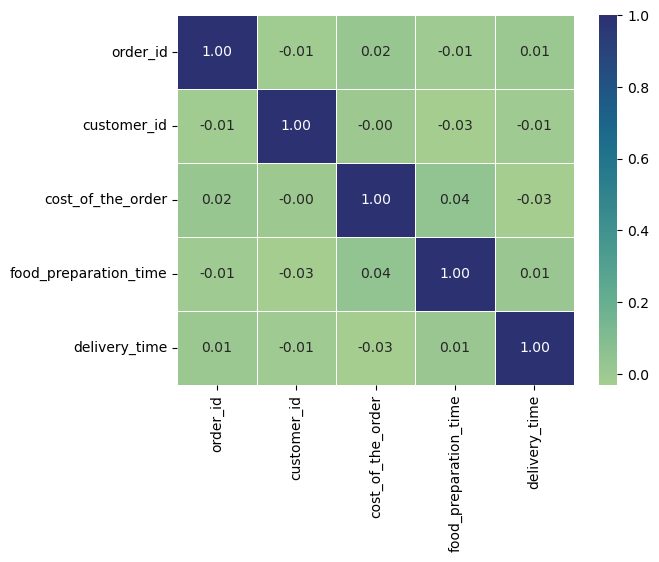

In [23]:
# PRont the heathmap of the cprrelations
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5,cmap="crest")

#### Observations:
As we can see in the correlation matrix, there is no clear correlation between any of the variables in the dataset. All the correlations are negative or really low which makes all the variables independent from eachother.

## Cuisine Type vs. Cost of Order

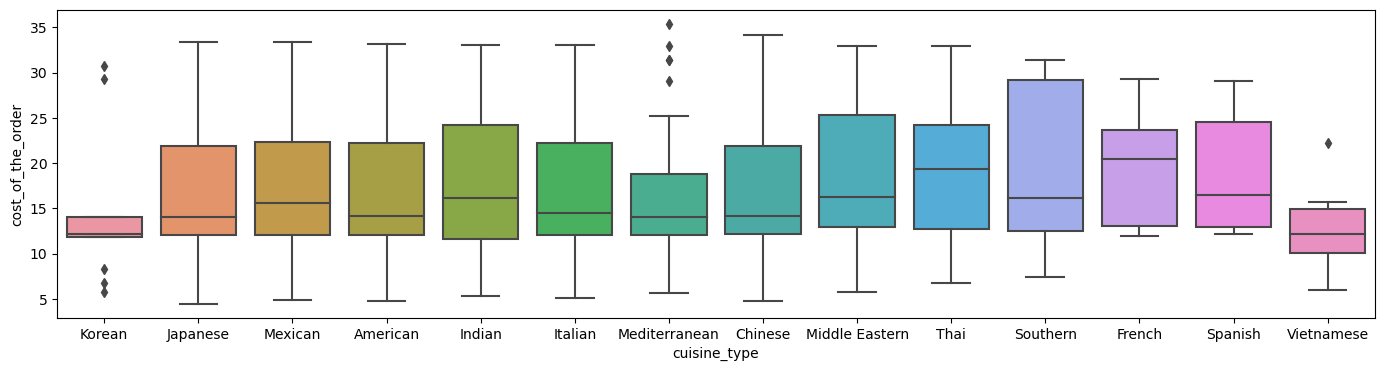

In [24]:
# Plot the Type of Cuisine vs the Cost of Order
plt.figure(figsize=(17, 4))
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order")
plt.show()

#### Observations:
From previous observations, we know that the American cuisine isthe most popular and the one that drives most sales. However we can see that it has a fairly low average cost of order compared to the other cuisines. Further analysis should be required to determine the adequate strategy to increase revenues and margins.

## Cuisine Type vs. Food Preparations Time

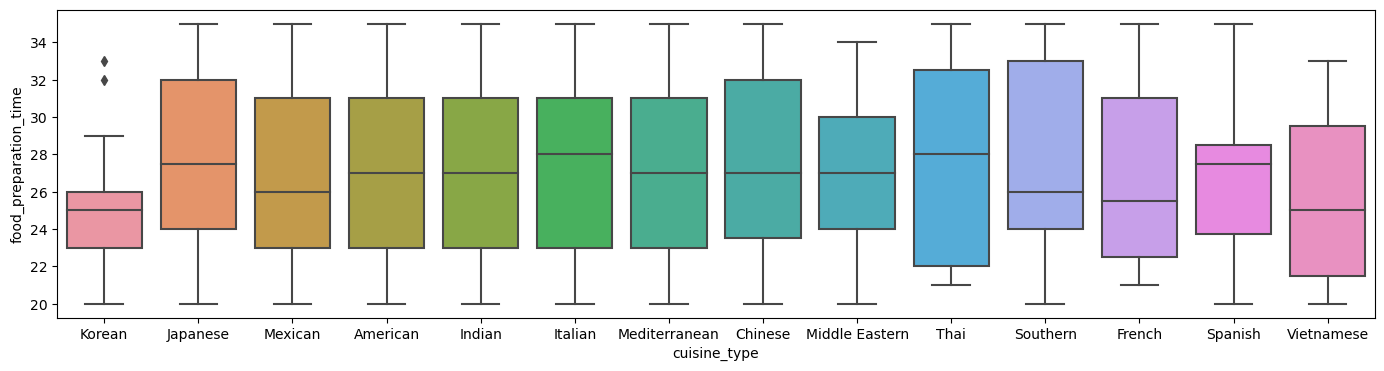

In [25]:
# Plot the Type of Cuisine vs the Preparation Time
plt.figure(figsize=(17, 4))
sns.boxplot(data=df, x="cuisine_type", y="food_preparation_time")
plt.show()

#### Observations:
we can see that Japaneese, Italian, Thai and Spanish cuisines have the largest preparation times. 

## Rating vs. Delivery Time

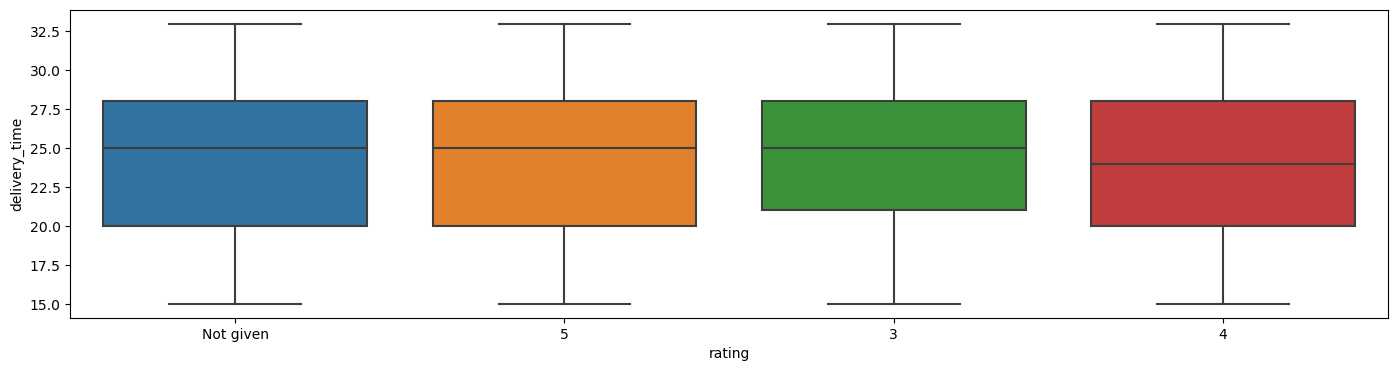

In [26]:
# Plot the Rating vs. the Delivery Time
plt.figure(figsize=(17, 4))
sns.boxplot(data=df, x="rating", y="delivery_time")
plt.show()

#### Observations:
There is no clear impact on the ratings from the delivery time perspective. All the delivery times seem to be aligned. The customer should be encouraged to leave ratings so the information can drive better sales.

## Top Customers vs Ratings

In [27]:
# Calculate the top 5 customers
topCustomer = df.groupby(by=['customer_id'])['order_id'].count()
topCustomer.sort_values(ascending=False).head()

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

In [28]:
# Top five customers and the rating
topCustomer = df.groupby(by=['customer_id', 'rating'])['order_id'].count()
topCustomer.sort_values(ascending=False).head()

customer_id  rating   
52832        Not given    6
65009        5            5
83287        Not given    5
60052        5            4
47440        4            4
Name: order_id, dtype: int64

#### Observations:
We can see that aroound 50% of the time, the customers do not leave a rating. 

## Rating vs. Day of the Week

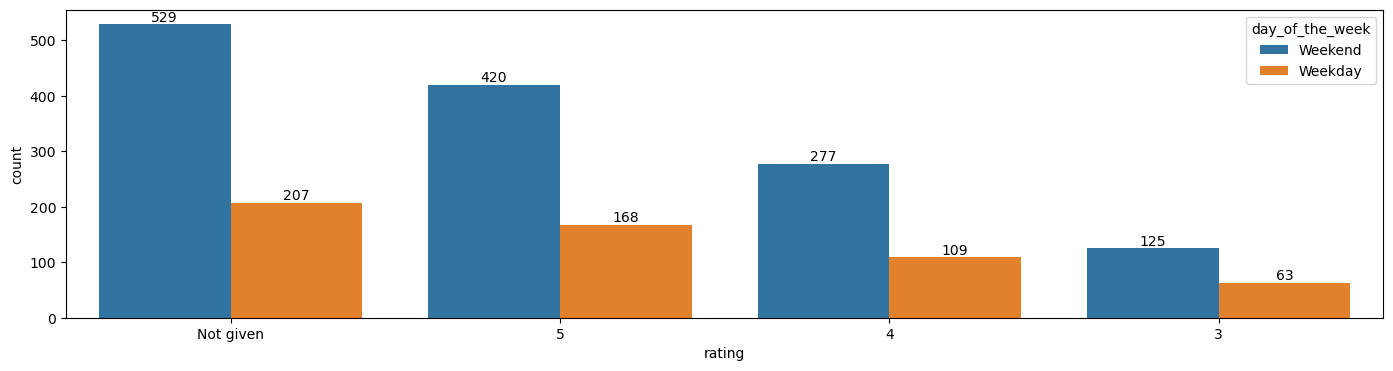

In [29]:
# Plot the Rating vs the DAy of the week
plt.figure(figsize=(17, 4))
weekendRating = sns.countplot(x="rating", hue="day_of_the_week", data=df, order = df.rating.value_counts().index)

for container in weekendRating.containers:
    weekendRating.bar_label(container)
    
plt.show()

#### Observations:
People are more likely to rate during the weekends than during the weekdays.

## Day of the week vs. Cost of Order

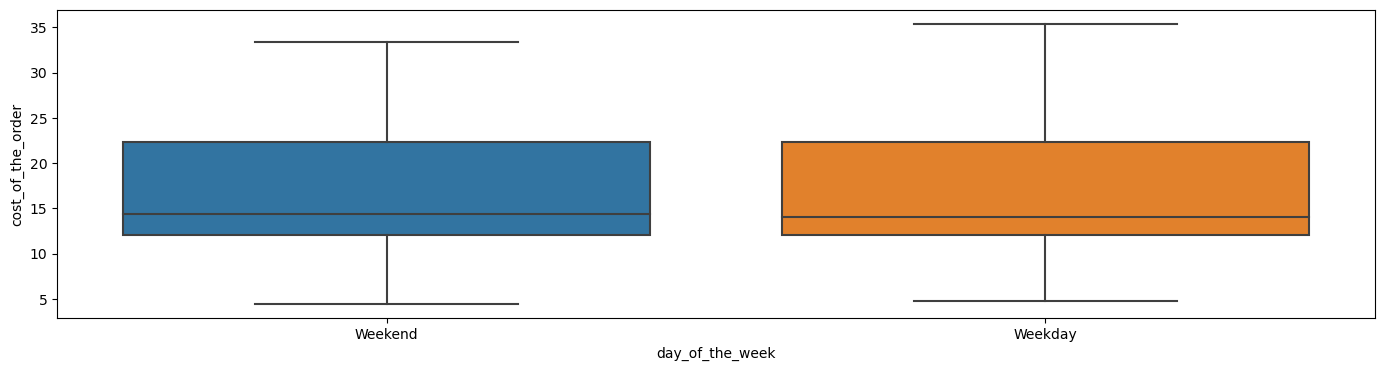

In [30]:
#Cost of the Order vs Day of the week
plt.figure(figsize=(17, 4))
sns.boxplot(data=df, x="day_of_the_week", y="cost_of_the_order")
plt.show()

#### Observations:
The cost of order is not impacted by the day of the week. Both boxplots are very similar showing that the cjost of the order will be the same during the week and during the weekend.

## Preparation time vs. Delivery time and Day of the Week

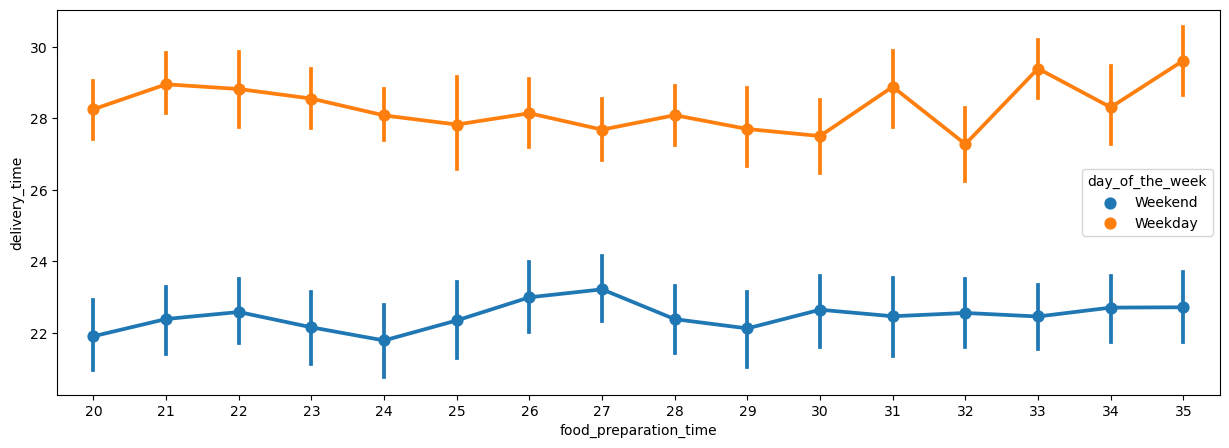

In [31]:
#food preparation time vs delivery time
plt.figure(figsize=(15,5))

sns.pointplot(x="food_preparation_time", y="delivery_time", hue = 'day_of_the_week',  data=df)
plt.show()

#### Observations:
We can see similarity in the preparation time and the delivery time regardless the day of the week. However, from minute 30 onwards, we can clearly see that there is a stronger impact during the weekdays which maybe caused by traffic.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Original dataset as a starting point
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [33]:
# Select from the data set only the restaurants that have been given a rating
rest_df = df[df['rating'] != 'Not given'].copy()
rest_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [34]:
# Convert the datatype object ot integer for the rating column
rest_df['rating']= rest_df['rating'].astype('int')
rest_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [35]:
# Get Restaurant with the New Rating excluding the 'Not Given' and greater than 50
rest_df_int = rest_df.groupby(by=['restaurant_name'])['rating'].count().reset_index().sort_values(by='rating', ascending = False)
rest_df_greater_than_50 = rest_df_int[rest_df_int['rating'] > 50]['restaurant_name']
rest_df_greater_than_50

117                  Shake Shack
132            The Meatball Shop
17             Blue Ribbon Sushi
16     Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [36]:
# Check the Rating is average rating is greater than 4

rest_df_mean = rest_df[rest_df['restaurant_name'].isin(rest_df_greater_than_50)]
rest_df_mean_select = rest_df_mean.groupby(by=['restaurant_name'])['rating'].mean().reset_index().sort_values(by='rating', ascending = True)
rest_df_mean_select

,restaurant_name,rating
1,Blue Ribbon Sushi,4.219178
2,Shake Shack,4.278195
0,Blue Ribbon Fried Chicken,4.328125
3,The Meatball Shop,4.511905


#### Observations:
The promotional offer should be granted to:

* Blue Ribbon Sushi
* Shake Shack
* Blue Ribbon Fried Chicken
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# Calculate the Revenue column assigning the correct percentages
df['Revenue'] = np.where(df['cost_of_the_order'] > 20, (df['cost_of_the_order']*0.25), np.where(df['cost_of_the_order'] > 5, (df['cost_of_the_order']*0.15),0))
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [38]:
# Determine the Total Revenue
net_revenue = df['Revenue'].sum()
net_revenue

6166.303

#### Observations:
The Net Revenue Generated across all orders is **6.166 dollars**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [39]:
# Calculate the Total Time required ( preparations time + delivery time)
df['TotalTime'] = (df['food_preparation_time'] + df['delivery_time'])
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,TotalTime
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [40]:
#Calculate the orders ove 60 minutes
orders_over_60_minutes = df[df['TotalTime']>60]['order_id'].count()
orders_over_60_minutes

200

In [41]:

print("The percentage of orders that take more that 60 minutes is : ", format(orders_over_60_minutes/len(df), '.2%'))

The percentage of orders that take more that 60 minutes is :  10.54%


#### Observations:
The percentage of orders that take more that 60 minutes is :  10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
# Write the code here
deliveryTime = df.groupby(by=['day_of_the_week'])['delivery_time'].mean()
print("The Delivery time during the Weekday is:", round(deliveryTime[0],2), "minutes and the Delivery time during the Weekend is:",round(deliveryTime[1],2), "minutes")
#deliveryTime[1]
#deliveryTime.sort_values(ascending=False)

The Delivery time during the Weekday is: 28.34 minutes and the Delivery time during the Weekend is: 22.47 minutes


#### Observations:
The Delivery time during the Weekday is: 28.34 minutes and the Delivery time during the Weekend is: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The correlation between the amount of deliveries and the delivery time is not clear. There might be additional factors that affect these times and are not contemplated in this data set. Further investigation or additional data should be requested to make the correct asessment and improvement to the business.
* The american couisine is the most popular, however the average order is in line with the whole population. A further review of the price should be carrried in order to drive better sales.

* Given that the Japaneese, Italian, Thai and Spanish cuisines have the largest preparation times. I recommend carrying further analysis to determine the cost benefit of the time invested in the preparations versus the operating margins to determine where the process can be streamlined.

* There is no clear impact on the ratings from the delivery time perspective. All the delivery times seem to be aligned. This need to be analysed to encourage customers to leave more ratings and drive sales.


* People are more likely to rate during the weekends than during the weekdays. This can be leveraged to improve the overall sales

### Recommendations:

* Additional data is required in order to make a clear assessment on the delivery times.
* The PRoduction Costs of the American Cuisine need to be reviewed in order to determine qhat can drive better sales.
* To carry out further analysis to the Japaneese, Italian, Thai and Spanish cuisines to determine the cost benefit of the time invested in the preparations versus the operating margins to determine where the process can be streamlined.
* Create ways to encourage te customers to leave ratings to drive sales in the future


---